In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [19]:
import tensorflow as tf

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


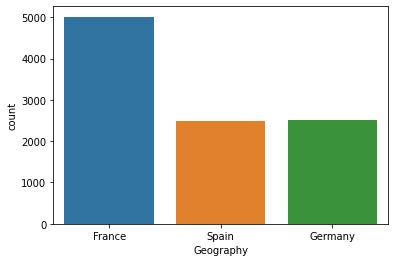

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


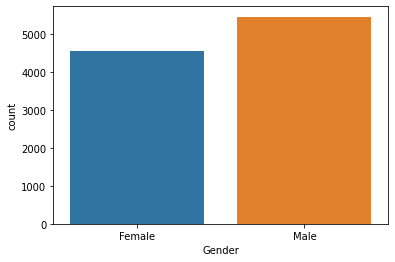

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


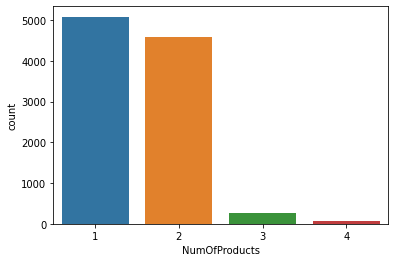

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


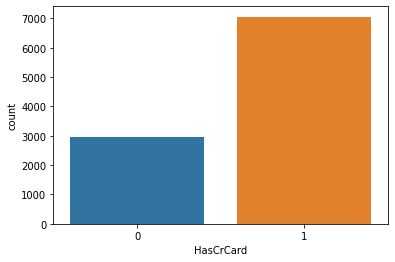

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


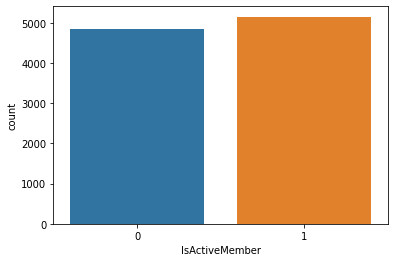

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


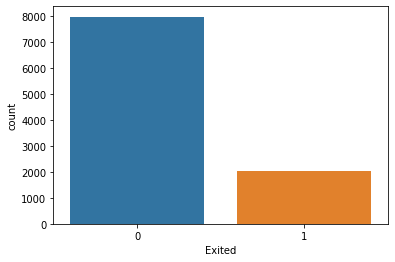

In [8]:
col=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited']
for i in col:
  sns.countplot(data[i]) 
  plt.show()

In [9]:
x=data.iloc[:,3:-1].values
y=data.iloc[:,-1].values

In [12]:
x,y

(array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
        [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
        [502, 'France', 'Female', ..., 1, 0, 113931.57],
        ...,
        [709, 'France', 'Female', ..., 0, 1, 42085.58],
        [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
        [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object),
 array([1, 0, 1, ..., 1, 1, 0]))

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [15]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [21]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.7864 - accuracy: 0.5321
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7987
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.8056
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8139
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8183
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8232
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8341
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8384
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8419
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3687 - accura

In [27]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [28]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8615

**We get 86% accuracy in ann model.**